<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ensemble_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### week 8

### ensemble learning
Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.

Accuracy (Decision Tree): 1.0
Accuracy (Random Forest): 1.0

Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



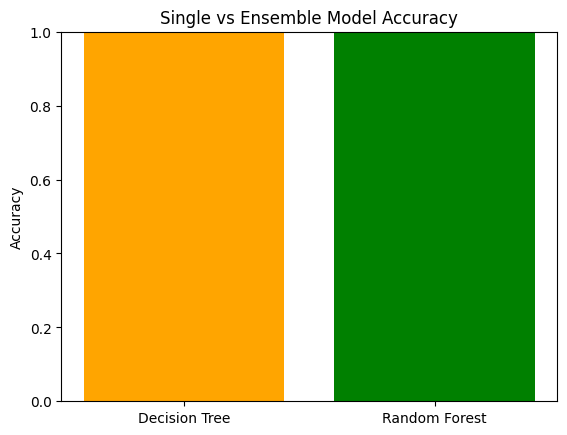

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy (Decision Tree):", acc_dt)
print("Accuracy (Random Forest):", acc_rf)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf, target_names=iris.target_names))

models = ['Decision Tree', 'Random Forest']
scores = [acc_dt, acc_rf]

plt.bar(models, scores, color=['orange','green'])
plt.title("Single vs Ensemble Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


## Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0

Decision Tree Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Random Forest Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



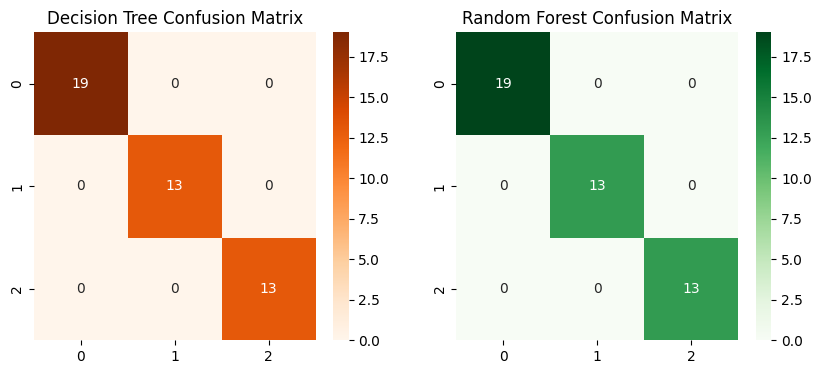

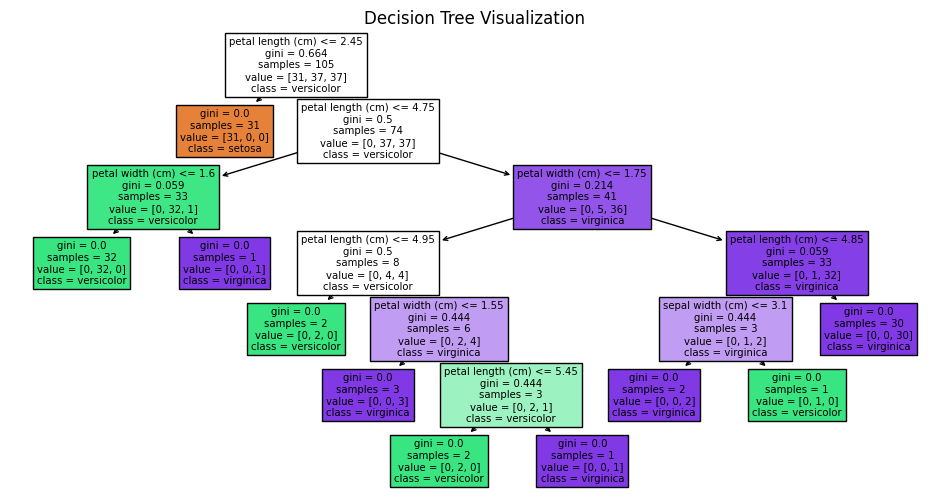

In [ ]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")

plt.show()

plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.show()


### max voting ,average voting ,average weighted voting in ensemble **learning**

In [ ]:
# Simple Ensemble Techniques: Max Voting, Average Voting, Weighted Voting

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
model1 = LogisticRegression(max_iter=1000)
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)

# Train models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)


# 1 Max Voting (Most common label wins)

final_pred = []
for i in range(len(y_test)):
    preds = [pred1[i], pred2[i], pred3[i]]
    final_pred.append(max(set(preds), key=preds.count))

acc_max = accuracy_score(y_test, final_pred)
print(f"Max Voting Accuracy: {acc_max:.4f}")

# 2 Average Voting (for probabilities)

prob1 = model1.predict_proba(X_test)
prob2 = model2.predict_proba(X_test)
prob3 = model3.predict_proba(X_test)

avg_probs = (prob1 + prob2 + prob3) / 3
final_avg = np.argmax(avg_probs, axis=1)

acc_avg = accuracy_score(y_test, final_avg)
print(f"Average Voting Accuracy: {acc_avg:.4f}")


#3 Weighted Average Voting


acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)

weights = np.array([acc1, acc2, acc3])
weighted_probs = (acc1 * prob1 + acc2 * prob2 + acc3 * prob3) / np.sum(weights)
final_weighted = np.argmax(weighted_probs, axis=1)

acc_weighted = accuracy_score(y_test, final_weighted)
print(f"Weighted Average Voting Accuracy: {acc_weighted:.4f}")


Max Voting Accuracy: 1.0000
Average Voting Accuracy: 1.0000
Weighted Average Voting Accuracy: 1.0000


### hard and soft voting

In [ ]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

# ---------------- Hard Voting ----------------
hard_voting = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'
)
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)
acc_hard = accuracy_score(y_test, y_pred_hard)
print("Hard Voting Accuracy:", acc_hard)
print("Classification Report (Hard Voting):\n", classification_report(y_test, y_pred_hard))

# ---------------- Soft Voting ----------------
soft_voting = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'  # average predicted probabilities
)
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)
acc_soft = accuracy_score(y_test, y_pred_soft)
print("Soft Voting Accuracy:", acc_soft)
print("Classification Report (Soft Voting):\n", classification_report(y_test, y_pred_soft))


Hard Voting Accuracy: 1.0
Classification Report (Hard Voting):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Soft Voting Accuracy: 1.0
Classification Report (Soft Voting):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### bagging **techique**

n_estimators=5, max_depth=2, Accuracy=0.907
n_estimators=5, max_depth=5, Accuracy=0.907
n_estimators=5, max_depth=10, Accuracy=0.926
n_estimators=5, max_depth=None, Accuracy=0.926
n_estimators=20, max_depth=2, Accuracy=0.944
n_estimators=20, max_depth=5, Accuracy=0.963
n_estimators=20, max_depth=10, Accuracy=0.963
n_estimators=20, max_depth=None, Accuracy=0.963
n_estimators=50, max_depth=2, Accuracy=0.963
n_estimators=50, max_depth=5, Accuracy=1.000
n_estimators=50, max_depth=10, Accuracy=1.000
n_estimators=50, max_depth=None, Accuracy=1.000
n_estimators=100, max_depth=2, Accuracy=0.963
n_estimators=100, max_depth=5, Accuracy=1.000
n_estimators=100, max_depth=10, Accuracy=1.000
n_estimators=100, max_depth=None, Accuracy=1.000


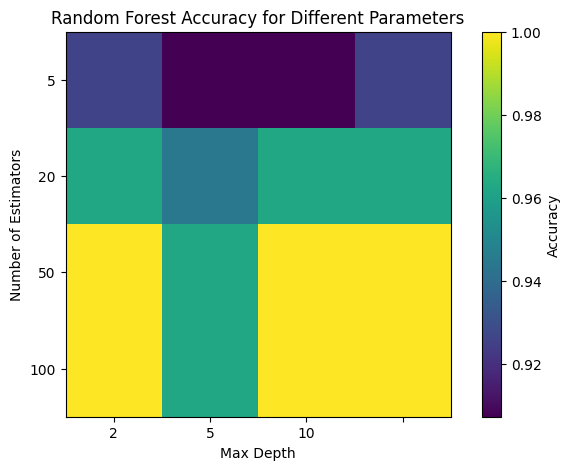


Final Model Performance:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [3]:
# -------------------------------------------------------
# Bagging Technique using RandomForestClassifier
# -------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_wine()
X = data.data
y = data.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Experiment with different parameters
estimators = [5, 20, 50, 100]
depths = [2, 5, 10, None]  # None = unlimited depth
scores = []

for n in estimators:
    for d in depths:
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=d,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores.append((n, d, acc))
        print(f"n_estimators={n}, max_depth={d}, Accuracy={acc:.3f}")

# Step 4: Visualize performance
results = pd.DataFrame(scores, columns=["n_estimators", "max_depth", "accuracy"])
pivot_table = results.pivot(index="n_estimators", columns="max_depth", values="accuracy")

plt.figure(figsize=(8, 5))
plt.title("Random Forest Accuracy for Different Parameters")
plt.imshow(pivot_table, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xticks(range(len(depths)), depths)
plt.yticks(range(len(estimators)), estimators)
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.show()

# Step 5: Final Model
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### oob score

In [5]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create Random Forest Regressor with OOB Score
rf_model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,       # Enable Out-of-Bag estimation
    random_state=42,
    n_jobs=-1             # Use all CPU cores for faster training
)

# Step 4: Train the model
rf_model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest Regressor Results")
print("----------------------------------")
print(f"OOB Score (Internal Validation): {rf_model.oob_score_:.4f}")
print(f"R² Score on Test Data:           {r2:.4f}")
print(f"Mean Squared Error:              {mse:.4f}")


✅ Random Forest Regressor Results
----------------------------------
OOB Score (Internal Validation): 0.8009
R² Score on Test Data:           0.8046
Mean Squared Error:              0.2565


### boosting techniques

In [8]:
# -------------------------------------------------------------
# Boosting Techniques: AdaBoost, Gradient Boosting, XGBoost, CatBoost
# -------------------------------------------------------------
from catboost import CatBoostClassifier


import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostClassifier

# ---------------------- 1️⃣ ADABOOST (Classification) ----------------------
print("🔹 AdaBoost Classifier on Breast Cancer Dataset")
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 60)

# ---------------------- 2️⃣ GRADIENT BOOSTING (Classification) ----------------------
print("🔹 Gradient Boosting Classifier on Breast Cancer Dataset")
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 60)

# ---------------------- 3️⃣ GRADIENT BOOSTING (Regression) ----------------------
print("🔹 Gradient Boosting Regressor on California Housing Dataset")
data_reg = fetch_california_housing(as_frame=True)
Xr, yr = data_reg.data, data_reg.target
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(Xr_train, yr_train)
y_pred_r = gb_reg.predict(Xr_test)
print("R² Score:", r2_score(yr_test, y_pred_r))
print("-" * 60)

# ---------------------- 4️⃣ XGBOOST ----------------------
print("🔹 XGBoost Classifier on Breast Cancer Dataset")
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 60)

# ---------------------- 5️⃣ CATBOOST ----------------------
print("🔹 CatBoost Classifier on Breast Cancer Dataset")
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 60)


🔹 AdaBoost Classifier on Breast Cancer Dataset
Accuracy: 0.9649122807017544
------------------------------------------------------------
🔹 Gradient Boosting Classifier on Breast Cancer Dataset
Accuracy: 0.9590643274853801
------------------------------------------------------------
🔹 Gradient Boosting Regressor on California Housing Dataset
R² Score: 0.804992915650479
------------------------------------------------------------
🔹 XGBoost Classifier on Breast Cancer Dataset
Accuracy: 0.9532163742690059
------------------------------------------------------------
🔹 CatBoost Classifier on Breast Cancer Dataset


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:21:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9707602339181286
------------------------------------------------------------
